In [1]:
import argparse
import itertools

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path
from gensim.models import KeyedVectors
from hmmlearn import hmm
import logging
import sys
from icecream import ic
import pickle as pkl
import datetime
from sklearn.manifold import TSNE

DATA_SET = "train"
PROJECT_PATH = "/Ziob/kabalce/FlowHMM"
sys.path.insert(1, PROJECT_PATH)


from torchHMM.model.discretized_HMM import DiscreteHMM
from sklearn.decomposition import PCA

np.random.seed(2023)
# TODO: add progress logging

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-rusqxtlx because the default path (/home/i300522/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
w2v_dims = [100, 250]
w2v_min_lens = [5, 10, 15, 20]
w2v_epochs = [5, 10, 25]

Data loaded.
Data transformed.


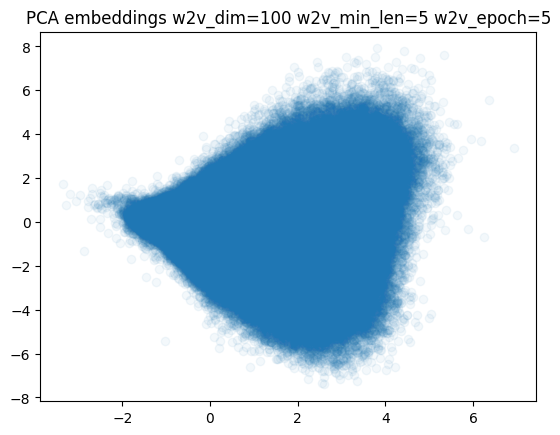

Data loaded.
Data transformed.


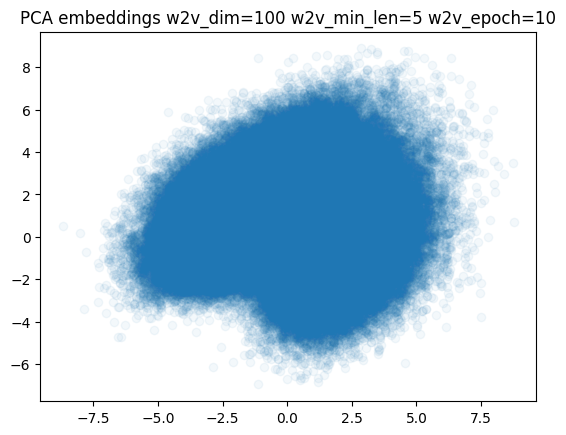

Data loaded.
Data transformed.


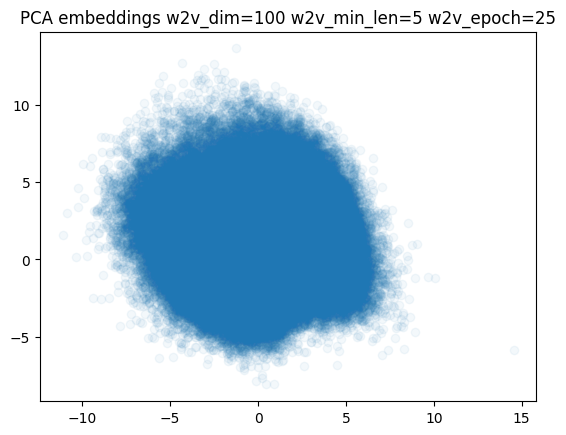

Data loaded.
Data transformed.


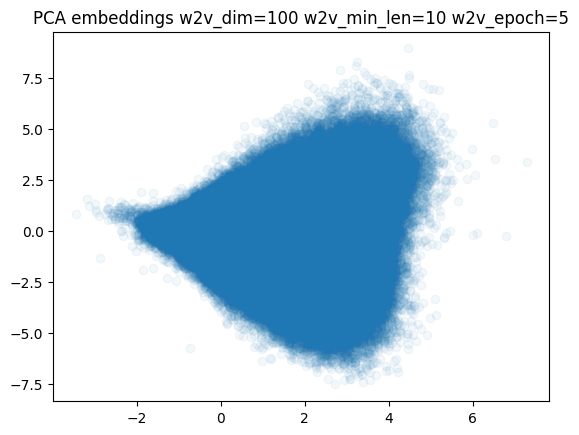

Data loaded.
Data transformed.


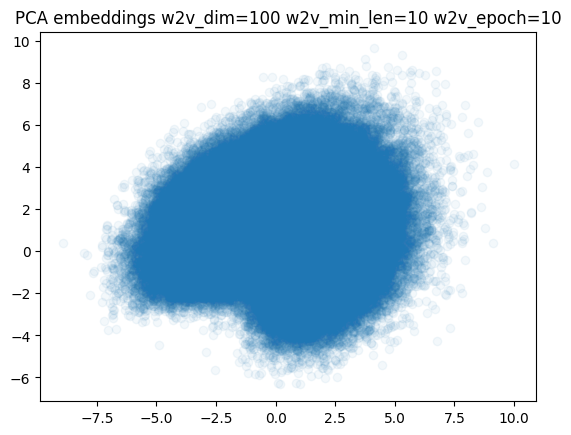

Data loaded.
Data transformed.


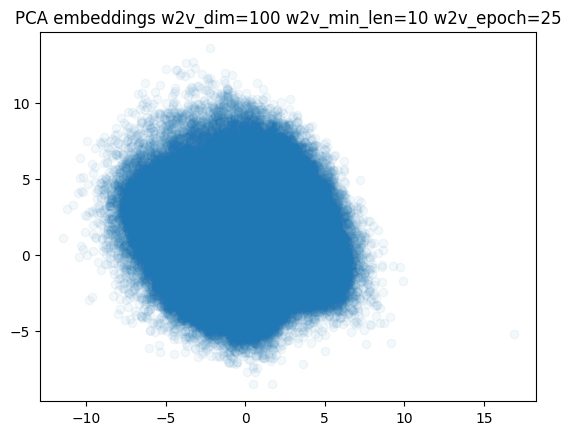

Data loaded.
Data transformed.


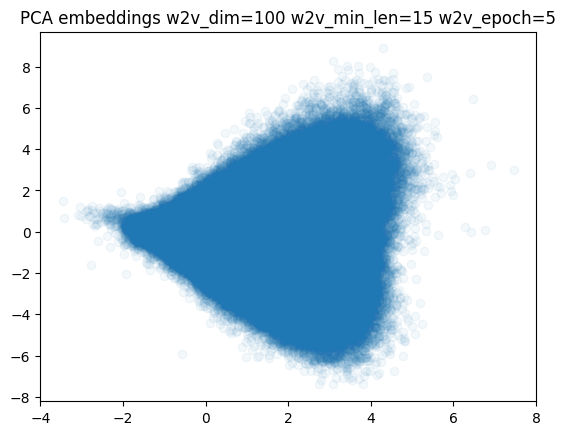

Data loaded.
Data transformed.


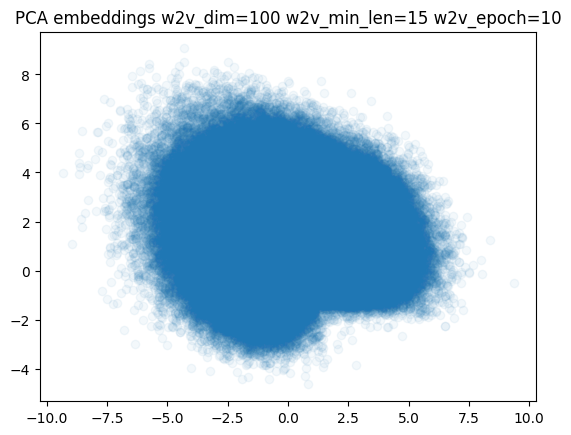

Data loaded.
Data transformed.


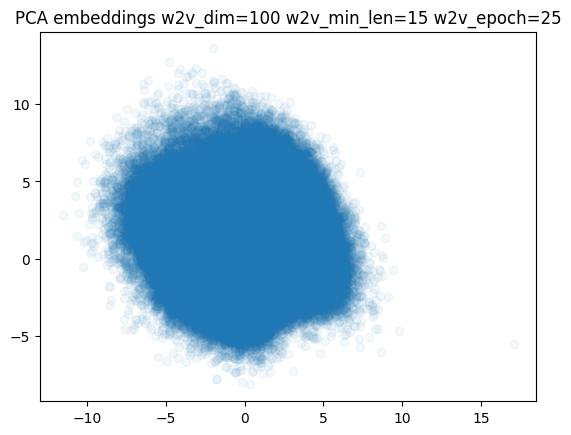

Data loaded.
Data transformed.


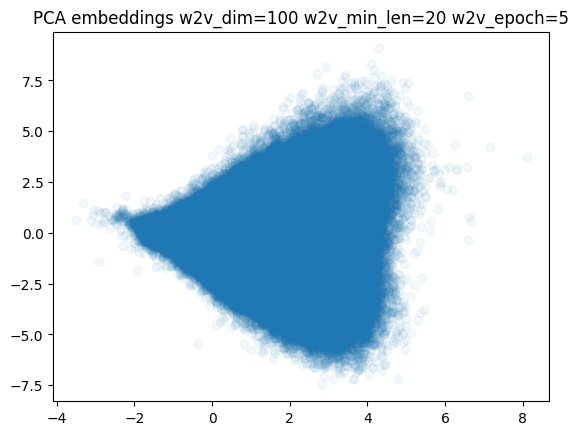

Data loaded.
Data transformed.


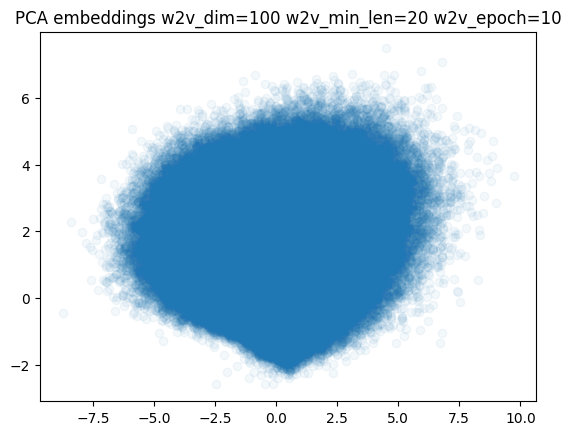

Data loaded.
Data transformed.


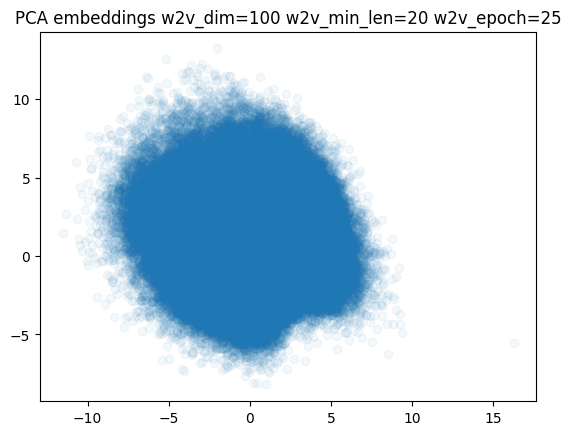

Data loaded.
Data transformed.


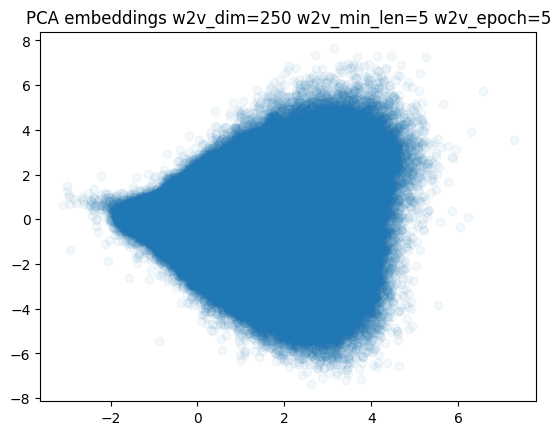

Data loaded.
Data transformed.


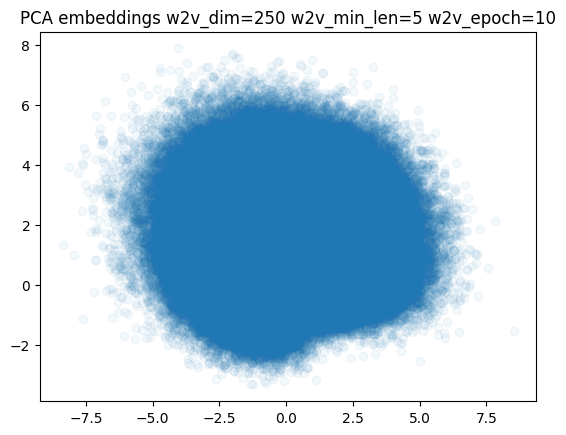

Data loaded.
Data transformed.


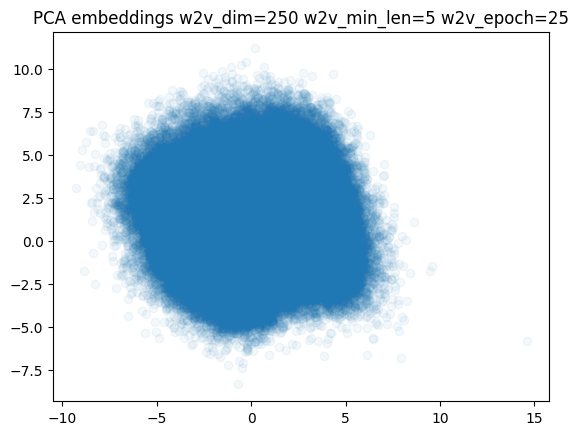

Data loaded.
Data transformed.


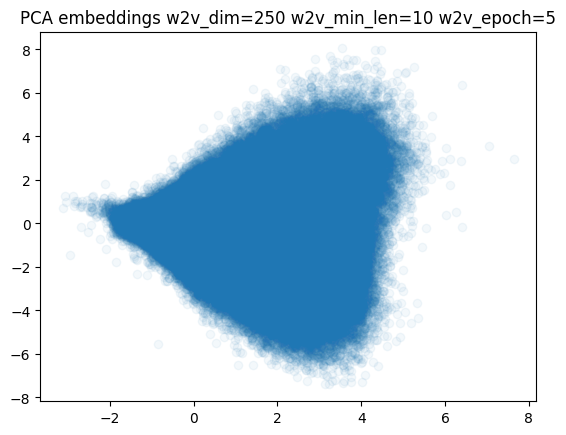

Data loaded.
Data transformed.


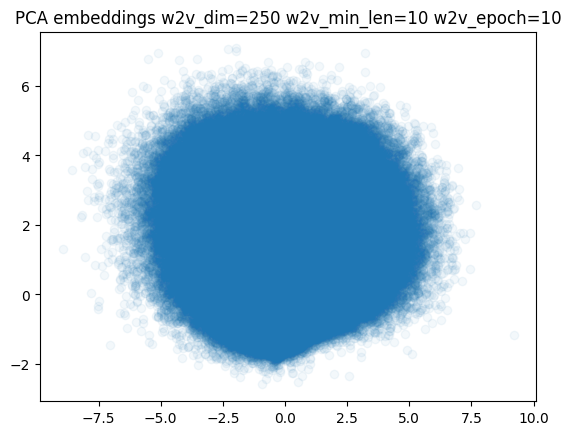

Data loaded.
Data transformed.


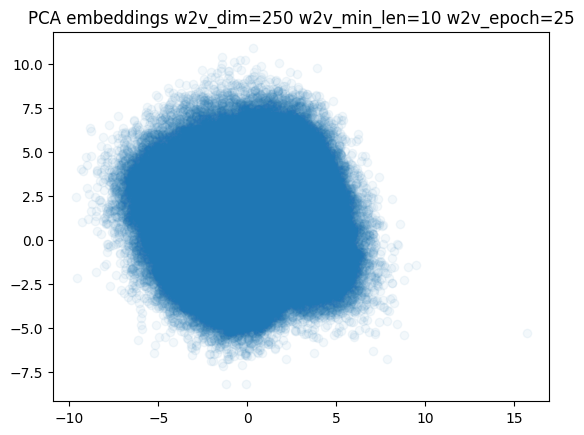

Data loaded.
Data transformed.


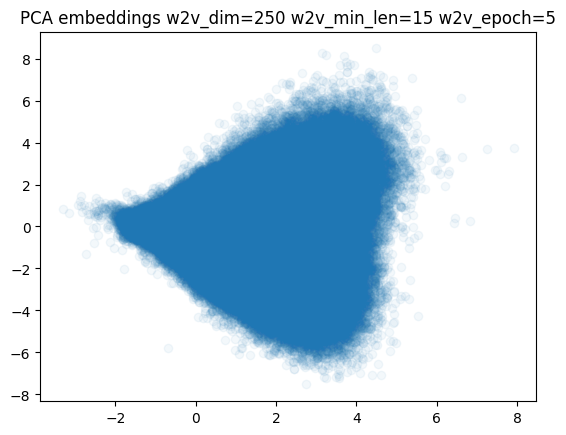

Data loaded.
Data transformed.


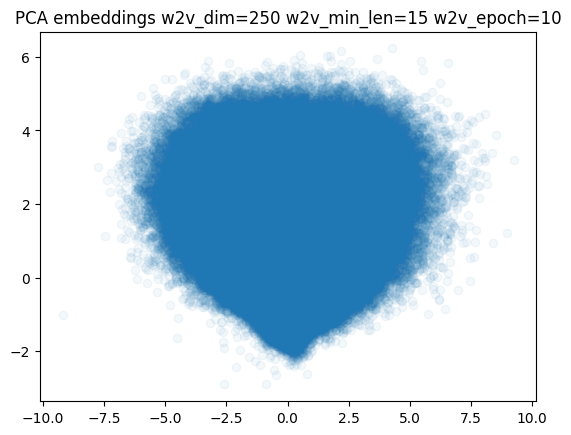

Data loaded.
Data transformed.


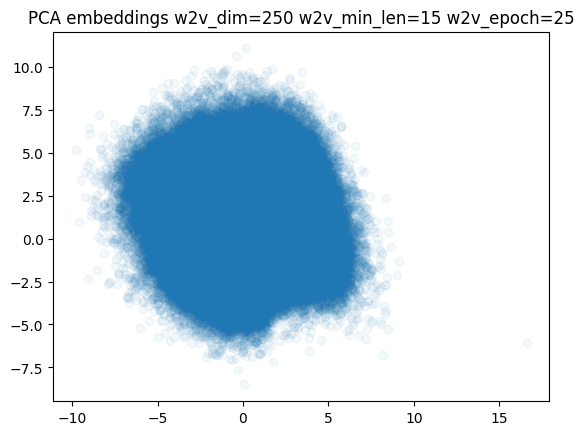

Data loaded.
Data transformed.


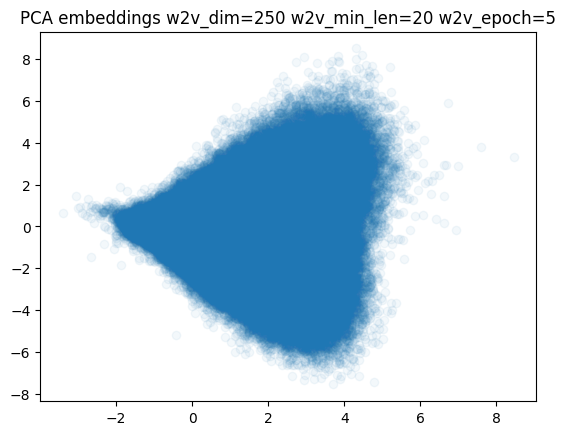

Data loaded.
Data transformed.


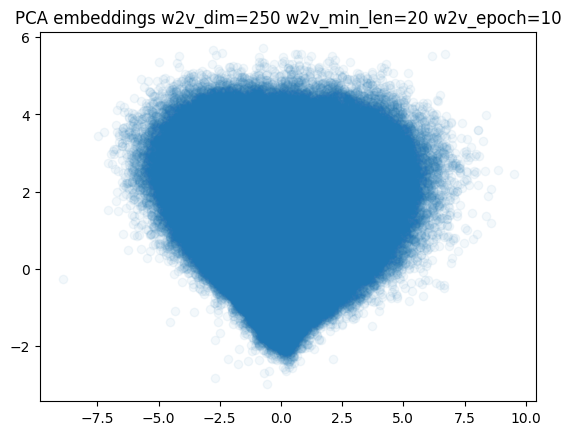

Data loaded.
Data transformed.


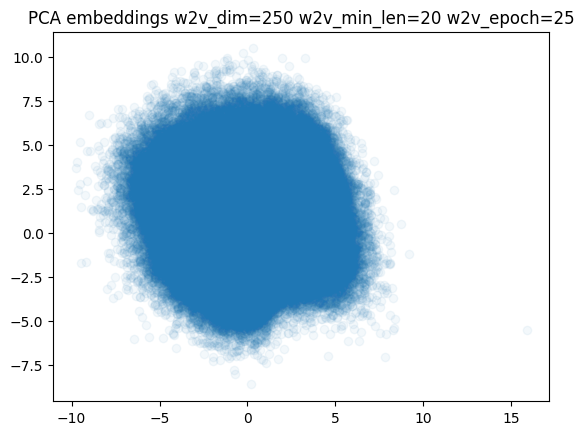

In [3]:
for w2v_dim, w2v_min_len, w2v_epoch in itertools.product(w2v_dims, w2v_min_lens, w2v_epochs):
    vectors = KeyedVectors.load(
            f"{PROJECT_PATH}/clickstream_experiment/data/preprocessed_data/vectors_train_{w2v_dim}_{w2v_min_len}_{w2v_epoch}.kv"
        )
    vecs = np.concatenate(
        [
            vectors.get_vector(k).reshape(1, -1)
            for k in list(vectors.key_to_index.keys())
        ]
    )
    print("Data loaded.")
    # vecs2d = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(vecs)
    # with open(f"{PROJECT_PATH}/clickstream_experiment/data/preprocessed_data/vectors_train_{w2v_dim}_{w2v_min_len}_{w2v_epoch}_2d_tsne.npy", "wb") as f:
    #     pkl.dump(vecs2d, f)
    vecs2d = PCA(n_components=2).fit_transform(vecs)
    with open(f"{PROJECT_PATH}/clickstream_experiment/data/preprocessed_data/vectors_train_{w2v_dim}_{w2v_min_len}_{w2v_epoch}_2d_pca.npy", "wb") as f:
        pkl.dump(vecs2d, f)
    print("Data transformed.")
    plt.scatter(vecs2d[:, 0], vecs2d[:, 1], alpha=0.05)
    plt.title(f"PCA embeddings w2v_dim={w2v_dim} w2v_min_len={w2v_min_len} w2v_epoch={w2v_epoch}")
    plt.savefig(f"{PROJECT_PATH}/clickstream_experiment/analysis/pca_{w2v_dim}_{w2v_min_len}_{w2v_epoch}.png")
    plt.show()

In [4]:
# for w2v_dim, w2v_min_len, w2v_epoch in itertools.product([250], [20], [10]):
#     vectors = KeyedVectors.load(
#             f"{PROJECT_PATH}/clickstream_experiment/data/preprocessed_data/vectors_train_{w2v_dim}_{w2v_min_len}_{w2v_epoch}.kv"
#         )
#     vecs = np.concatenate(
#         [
#             vectors.get_vector(k).reshape(1, -1)
#             for k in list(vectors.key_to_index.keys())
#         ]
#     )
#     print("Data loaded.")
#     # vecs2d = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(vecs)
#     # with open(f"{PROJECT_PATH}/clickstream_experiment/data/preprocessed_data/vectors_train_{w2v_dim}_{w2v_min_len}_{w2v_epoch}_2d_tsne.npy", "wb") as f:
#     #     pkl.dump(vecs2d, f)
#     vecs2d = PCA(n_components=2).fit_transform(vecs)
#     with open(f"{PROJECT_PATH}/clickstream_experiment/data/preprocessed_data/vectors_train_{w2v_dim}_{w2v_min_len}_{w2v_epoch}_2d_pca.npy", "wb") as f:
#         pkl.dump(vecs2d, f)
#     print("Data transformed.")
#     plt.scatter(vecs2d[:, 0], vecs2d[:, 1])
#     plt.title(f"PCA embeddings w2v_dim={w2v_dim} w2v_min_len={w2v_min_len} w2v_epoch={w2v_epoch}")
#     # plt.savefig(f"{PROJECT_PATH}/clickstream_experiment/analysis/pca_{w2v_dim}_{w2v_min_len}_{w2v_epoch}.png")
#     plt.show()
#
#     sns.kdeplot(
#         x=vecs2d[:, 0], y=vecs2d[:, 1], fill=True
#     )
#     plt.title(f"PCA KDE embeddings w2v_dim={w2v_dim} w2v_min_len={w2v_min_len} w2v_epoch={w2v_epoch}")
#     plt.savefig(f"{PROJECT_PATH}/clickstream_experiment/analysis/pca_kde_{w2v_dim}_{w2v_min_len}_{w2v_epoch}.png")
#     plt.show()

In [5]:
# for w2v_dim, w2v_min_len, w2v_epoch in itertools.product([250], [20], [5]):
#     vectors = KeyedVectors.load(
#         f"{PROJECT_PATH}/clickstream_experiment/data/preprocessed_data/vectors_train_{w2v_dim}_{w2v_min_len}_{w2v_epoch}.kv"
#     )
#     vecs = np.concatenate(
#         [
#             vectors.get_vector(k).reshape(1, -1)
#             for k in list(vectors.key_to_index.keys())
#         ]
#     )
#     print("Data loaded.")
#     # vecs2d = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(vecs)
#     # with open(f"{PROJECT_PATH}/clickstream_experiment/data/preprocessed_data/vectors_train_{w2v_dim}_{w2v_min_len}_{w2v_epoch}_2d_tsne.npy", "wb") as f:
#     #     pkl.dump(vecs2d, f)
#     vecs2d = PCA(n_components=2).fit_transform(vecs)
#     with open(
#             f"{PROJECT_PATH}/clickstream_experiment/data/preprocessed_data/vectors_train_{w2v_dim}_{w2v_min_len}_{w2v_epoch}_2d_pca.npy",
#             "wb") as f:
#         pkl.dump(vecs2d, f)
#     print("Data transformed.")
#     plt.scatter(vecs2d[:, 0], vecs2d[:, 1], alpha=0.05)
#     plt.title(f"PCA embeddings w2v_dim={w2v_dim} w2v_min_len={w2v_min_len} w2v_epoch={w2v_epoch}")
#     plt.savefig(f"{PROJECT_PATH}/clickstream_experiment/analysis/pca_{w2v_dim}_{w2v_min_len}_{w2v_epoch}.png")
#     plt.show()
#
#     sns.kdeplot(
#         x=vecs2d[:, 0], y=vecs2d[:, 1], fill=True
#     )
#     plt.title(f"PCA KDE embeddings w2v_dim={w2v_dim} w2v_min_len={w2v_min_len} w2v_epoch={w2v_epoch}")
#     plt.savefig(f"{PROJECT_PATH}/clickstream_experiment/analysis/pca_kde_{w2v_dim}_{w2v_min_len}_{w2v_epoch}.png")
#     plt.show()

Data loaded.
Data transformed.


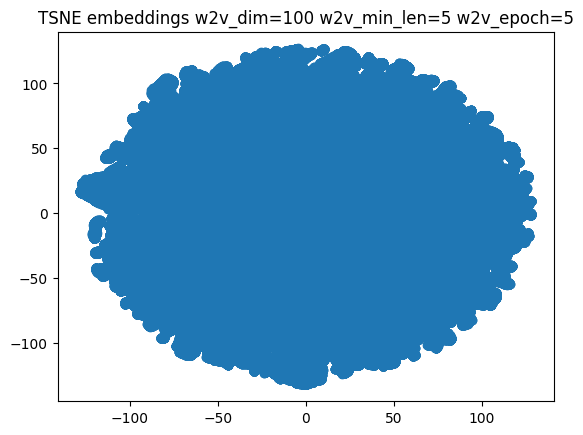

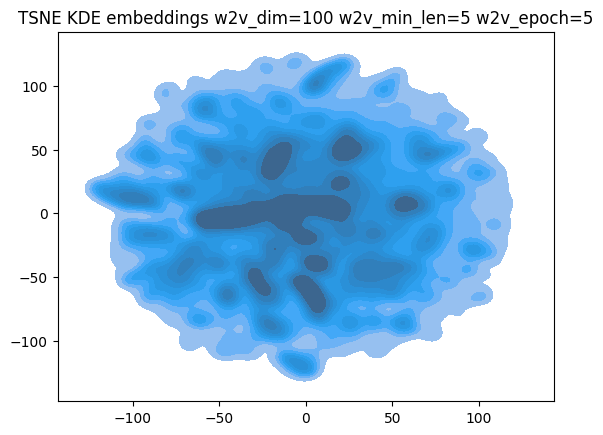

Data loaded.
Data transformed.


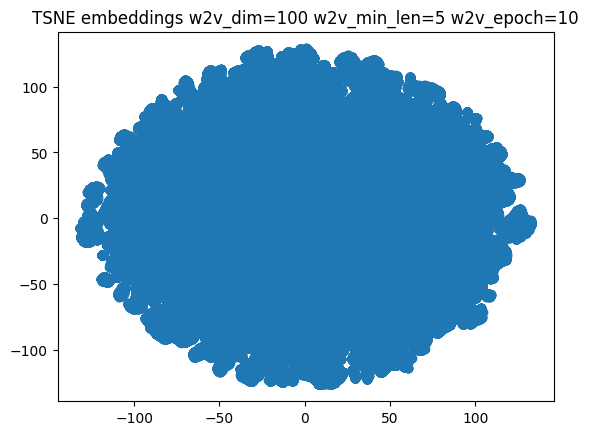

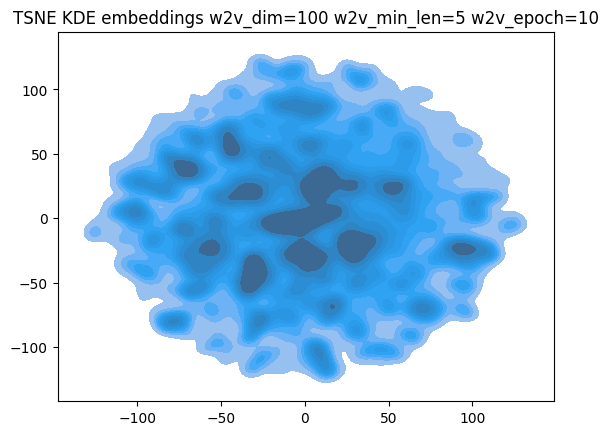

Data loaded.
Data transformed.


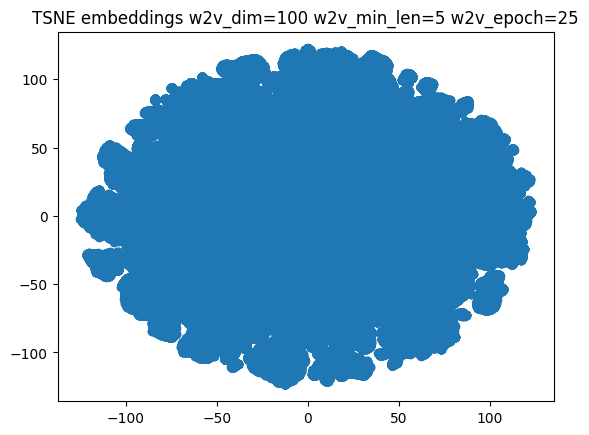

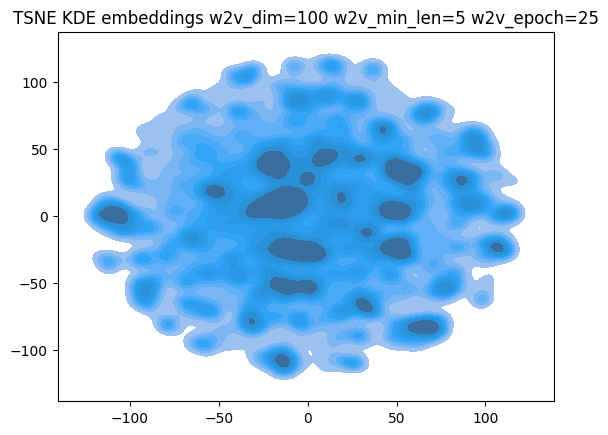

Data loaded.
Data transformed.


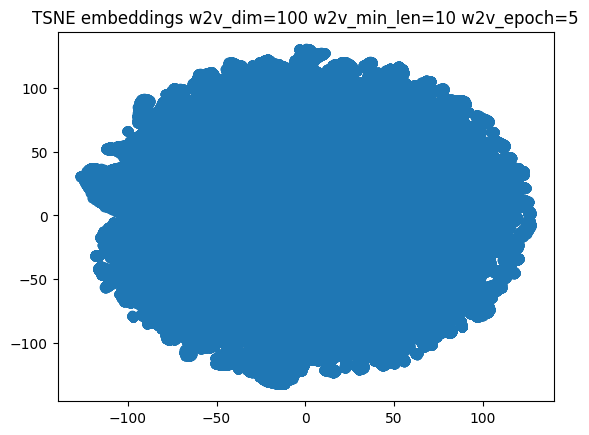

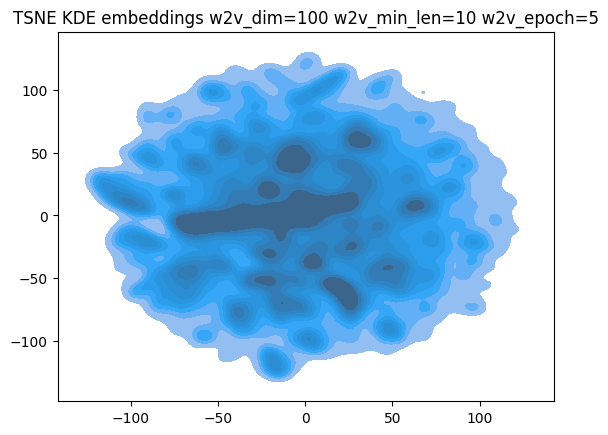

Data loaded.
Data transformed.


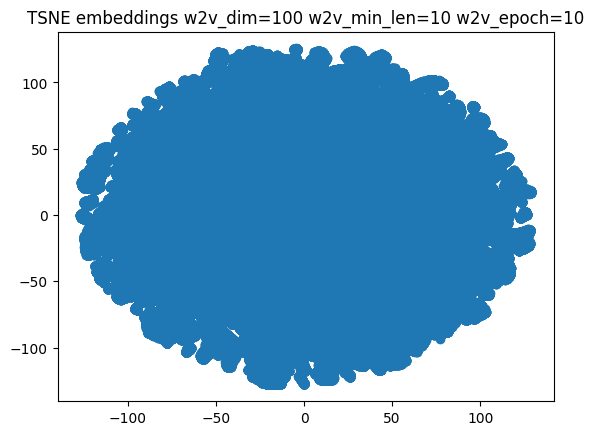

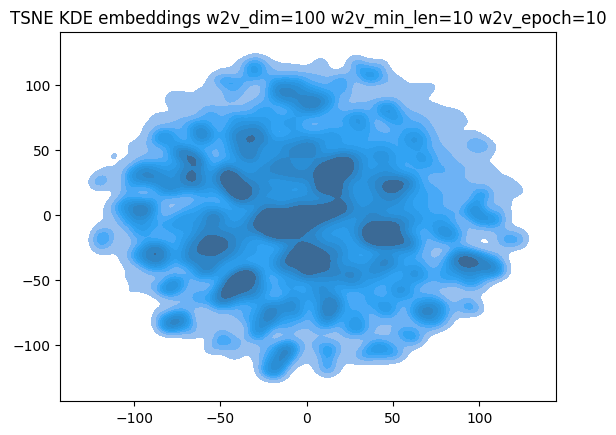

Data loaded.
Data transformed.


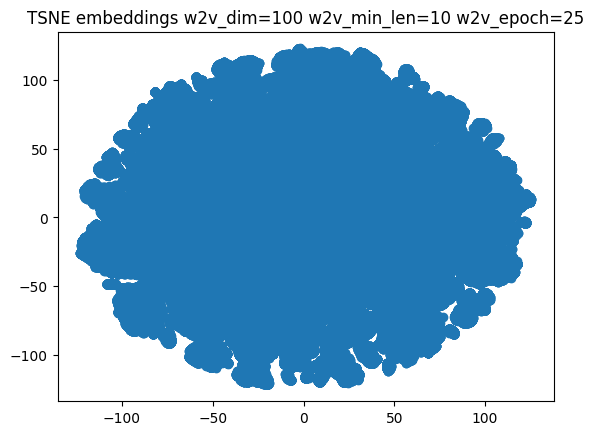

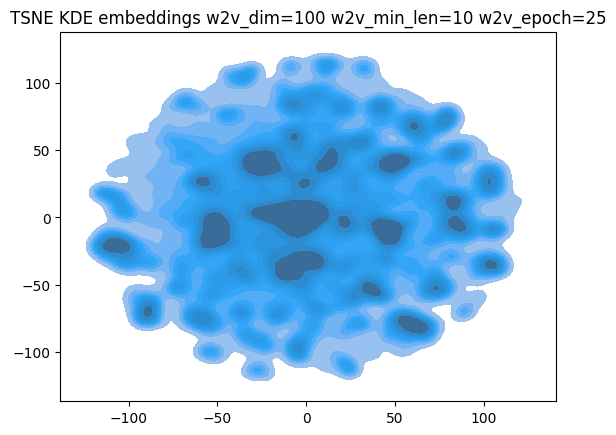

Data loaded.
Data transformed.


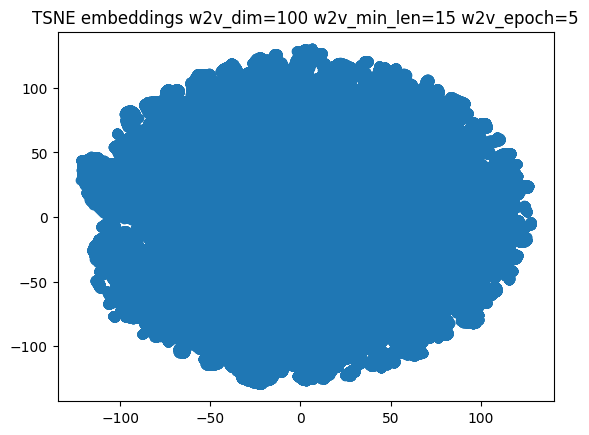

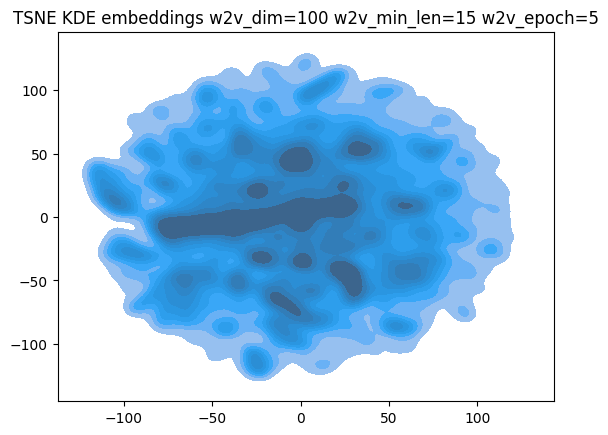

Data loaded.
Data transformed.


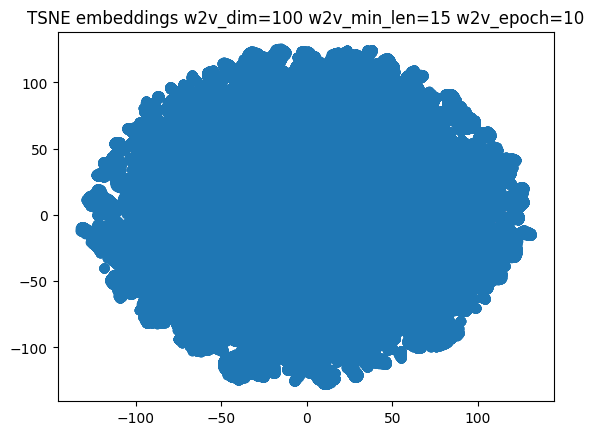

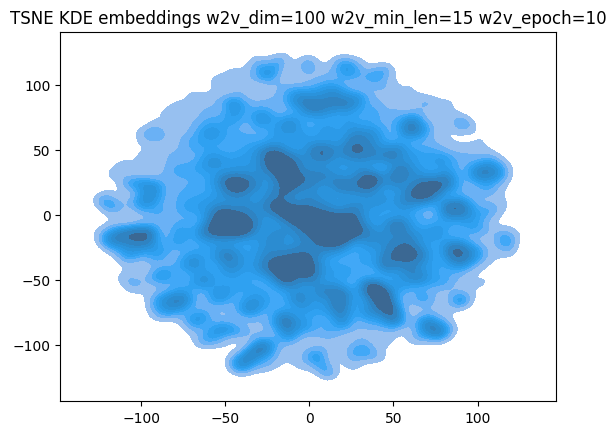

Data loaded.
Data transformed.


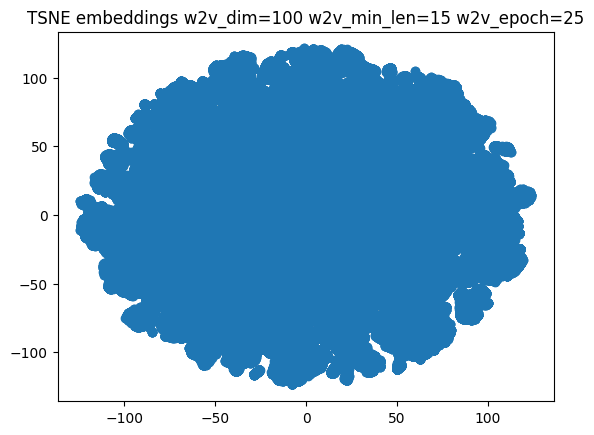

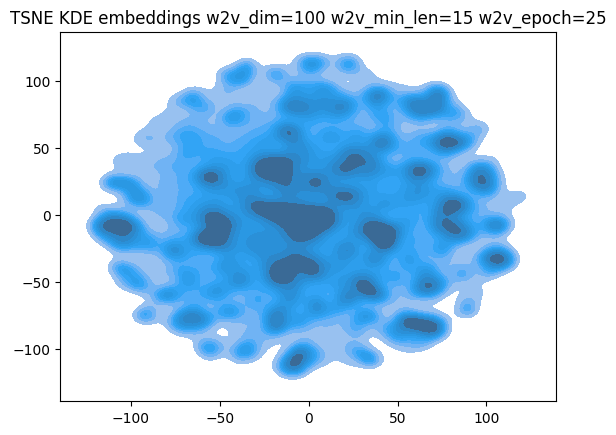

Data loaded.
Data transformed.


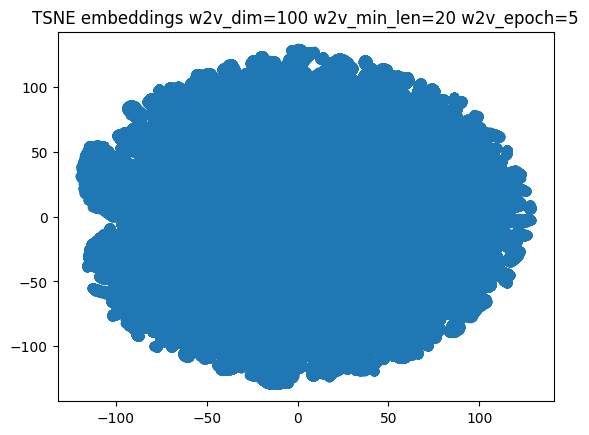

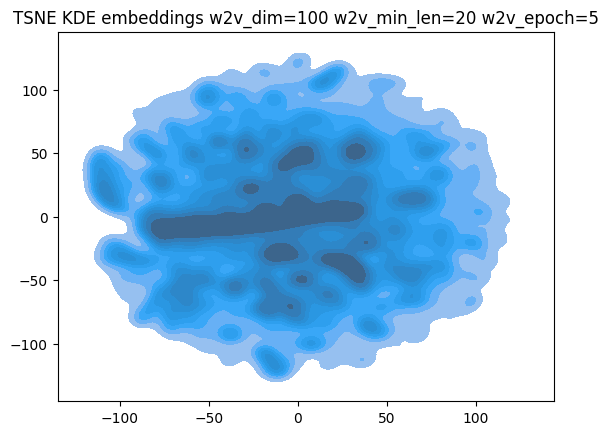

Data loaded.
Data transformed.


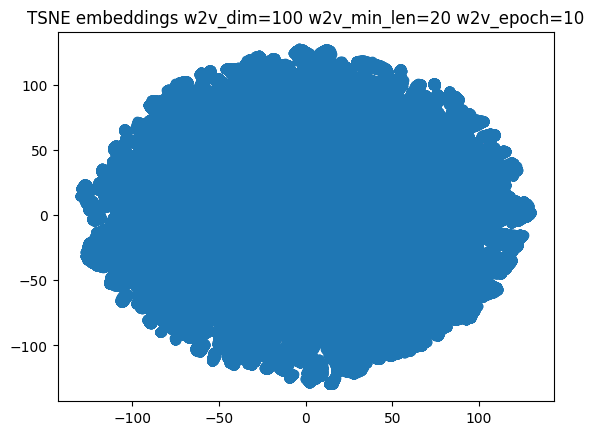

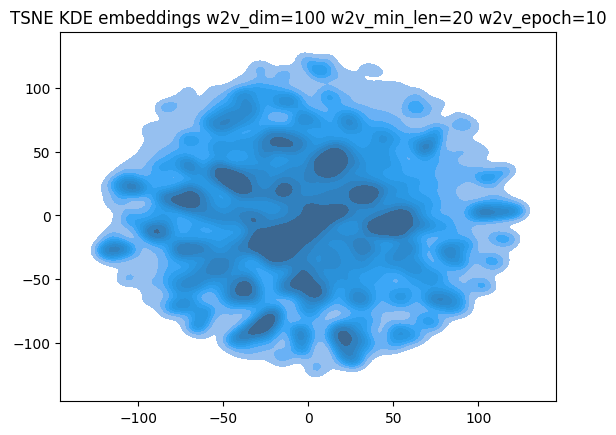

Data loaded.
Data transformed.


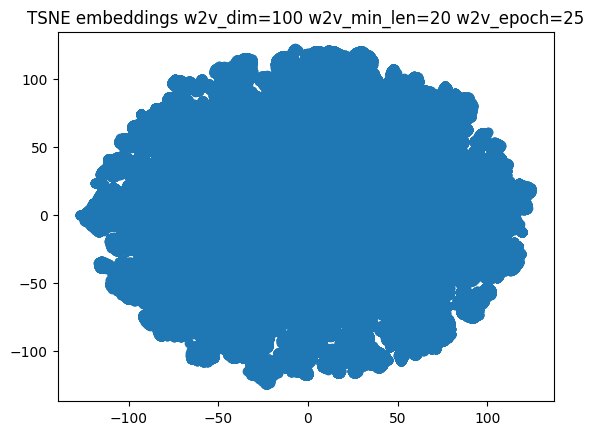

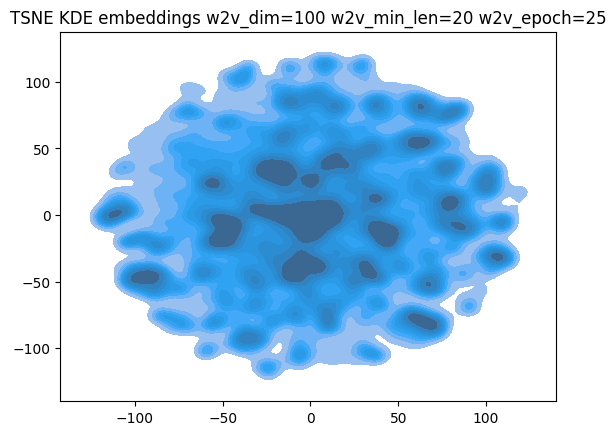

Data loaded.
Data transformed.


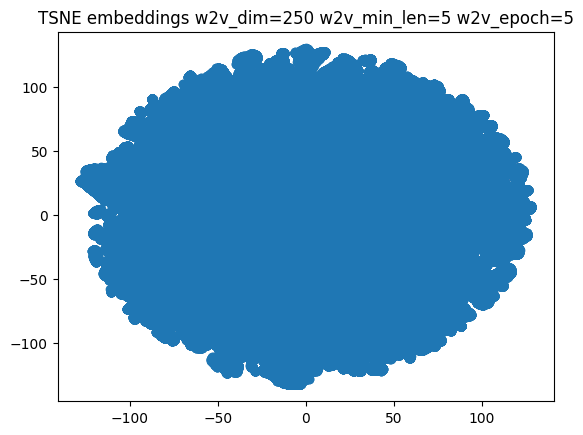

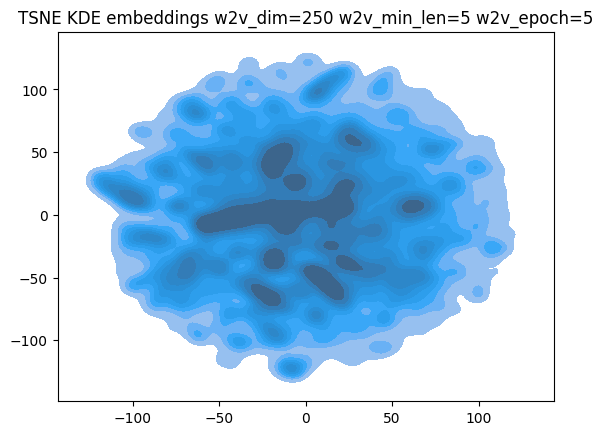

Data loaded.
Data transformed.


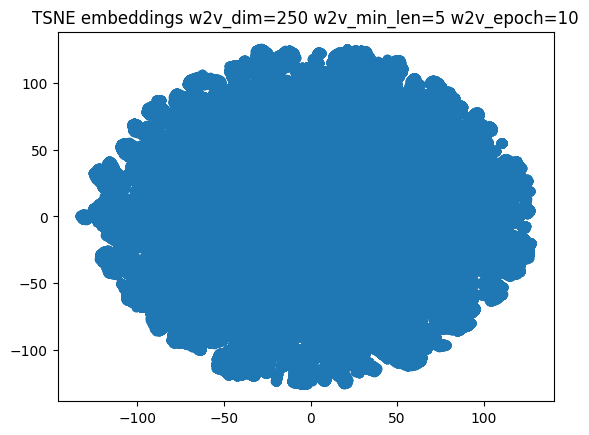

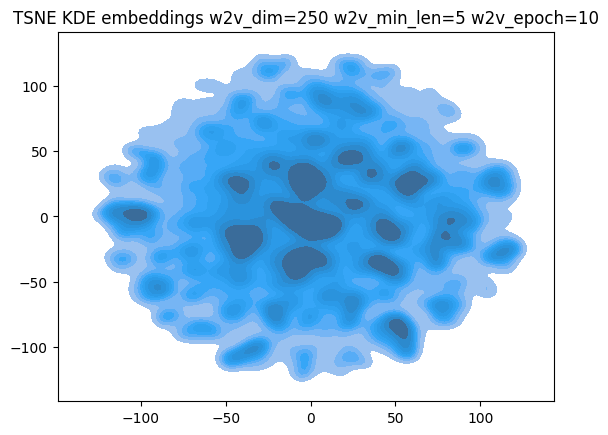

Data loaded.
Data transformed.


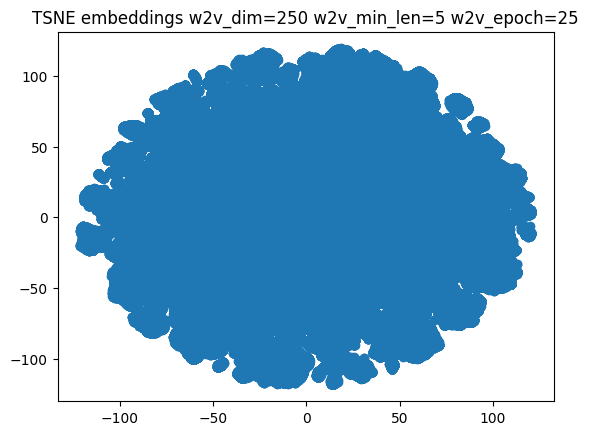

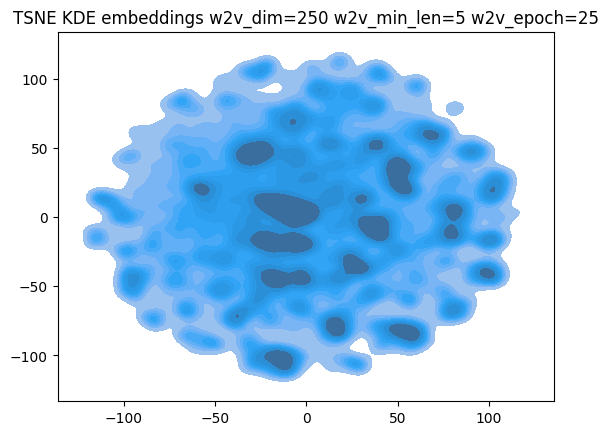

Data loaded.
Data transformed.


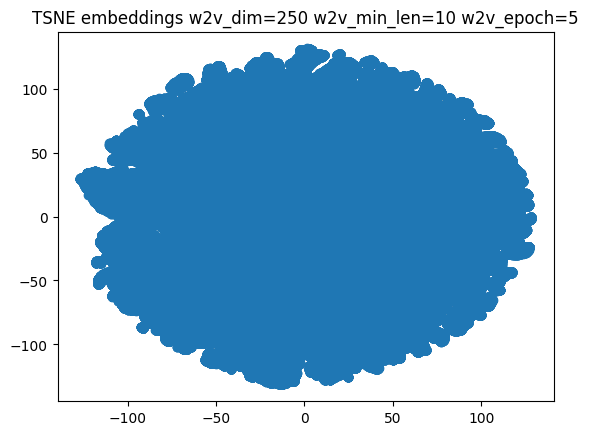

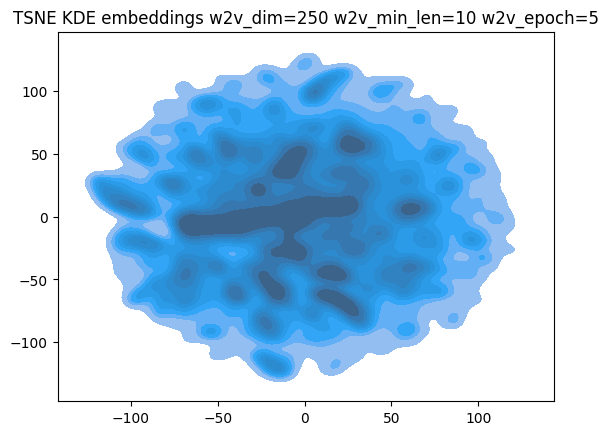

Data loaded.
Data transformed.


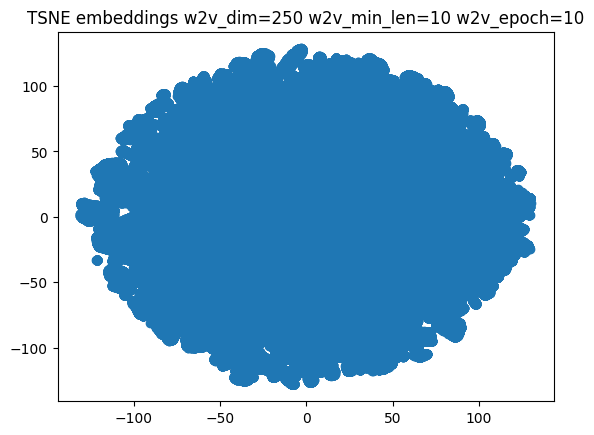

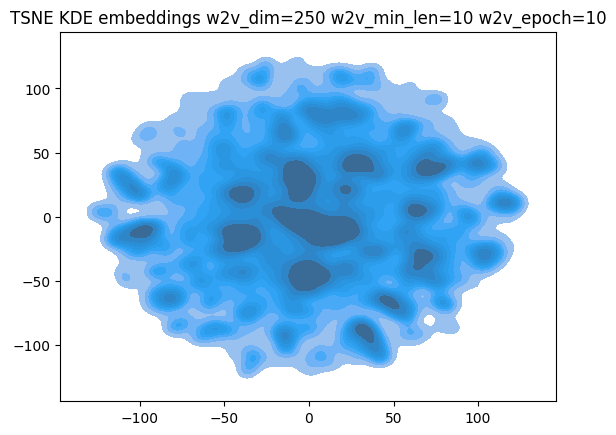

Data loaded.
Data transformed.


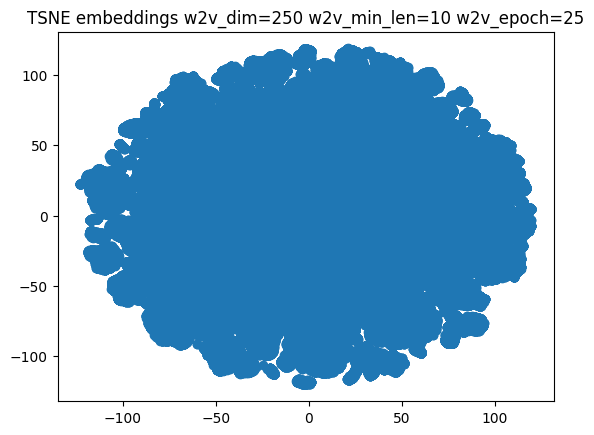

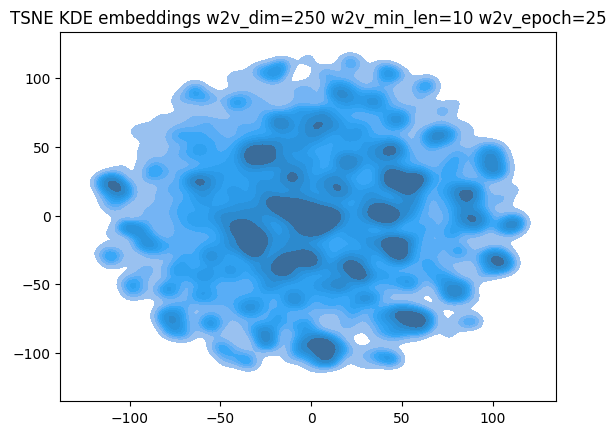

Data loaded.
Data transformed.


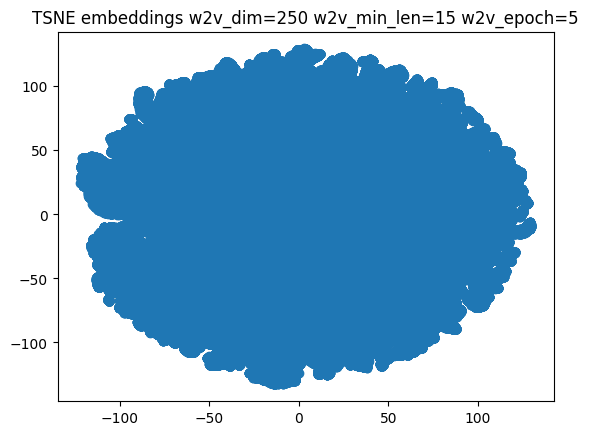

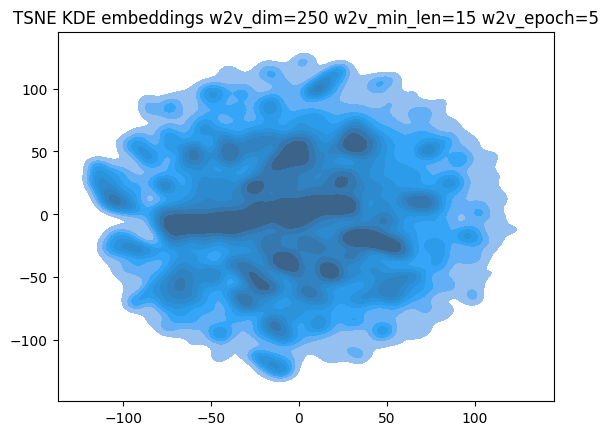

Data loaded.
Data transformed.


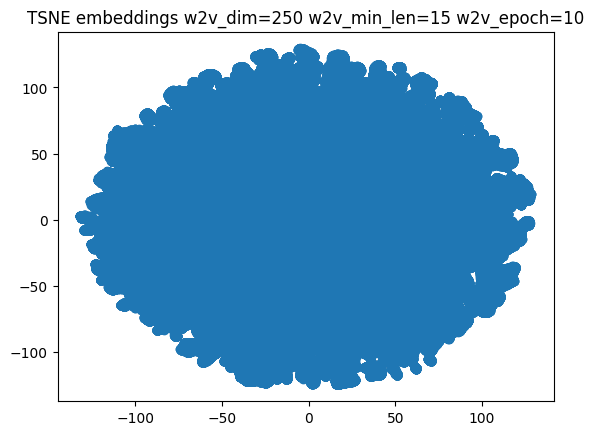

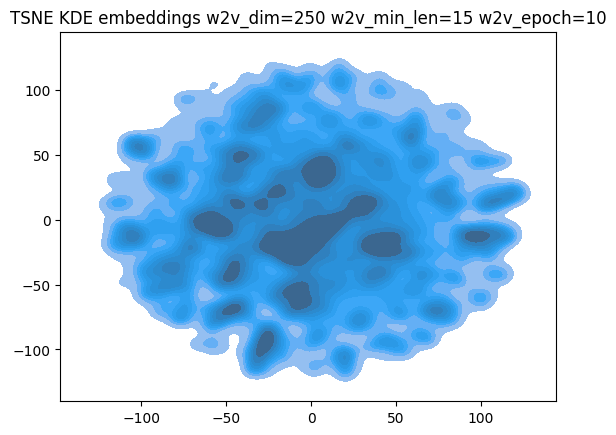

Data loaded.
Data transformed.


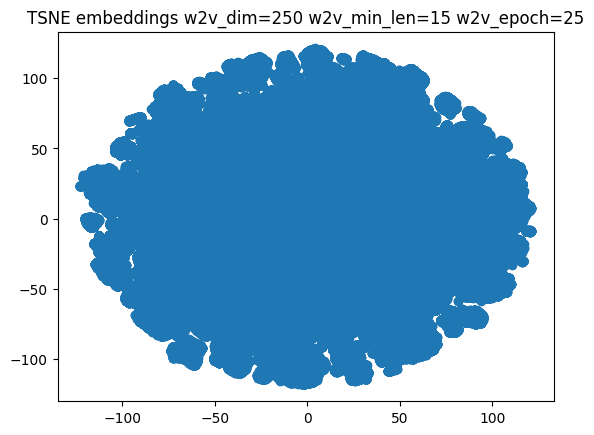

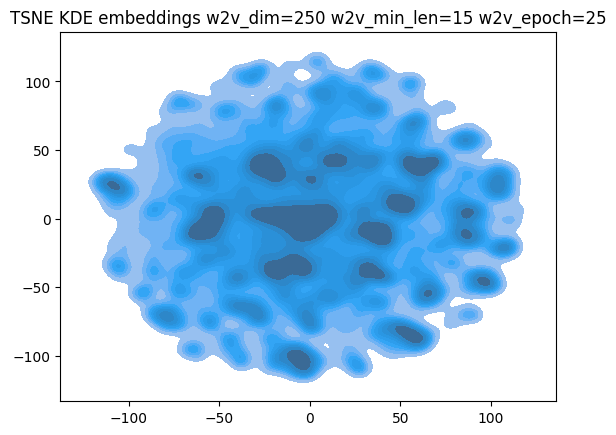

Data loaded.
Data transformed.


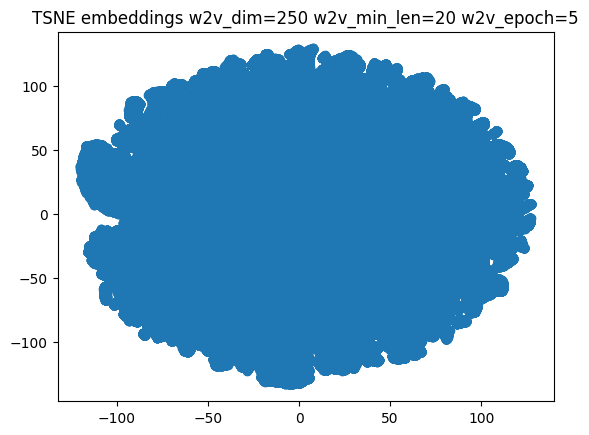

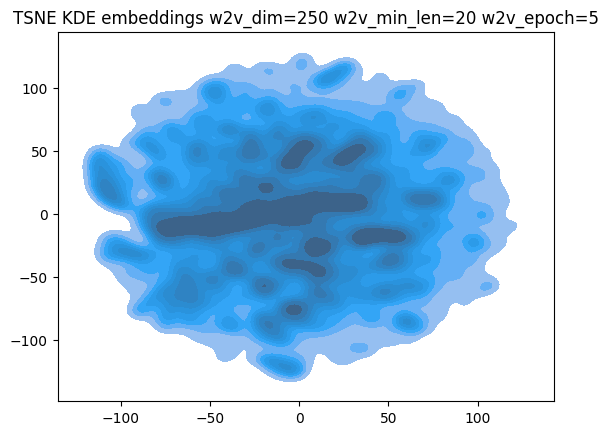

Data loaded.
Data transformed.


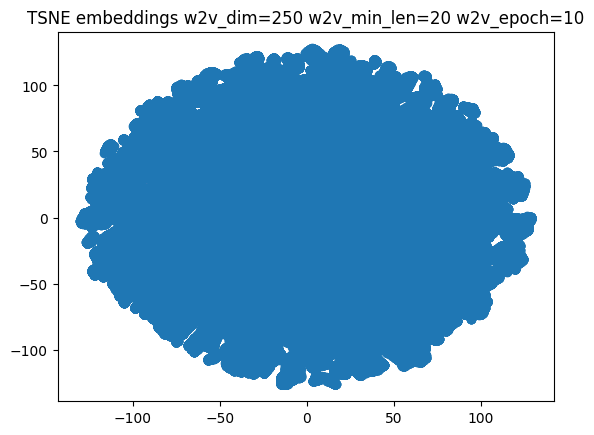

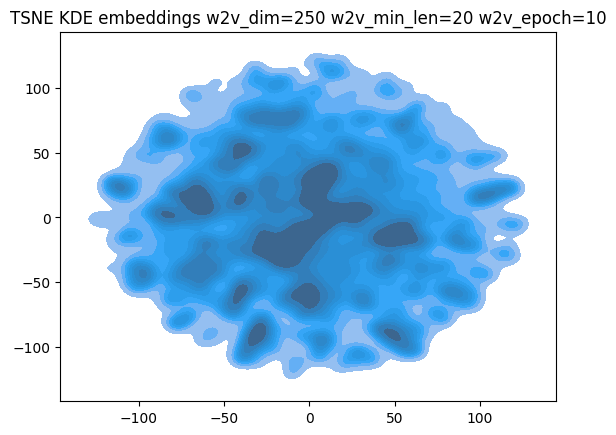

Data loaded.
Data transformed.


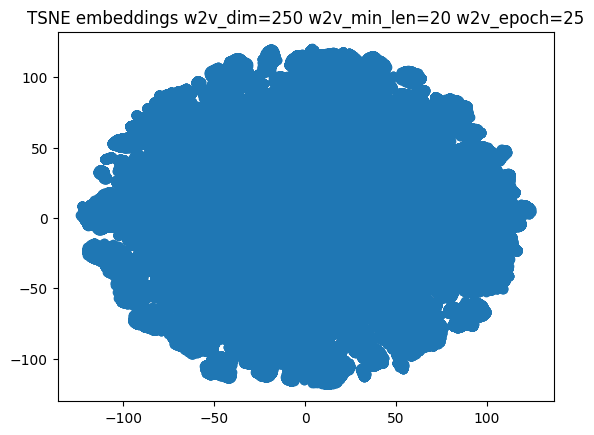

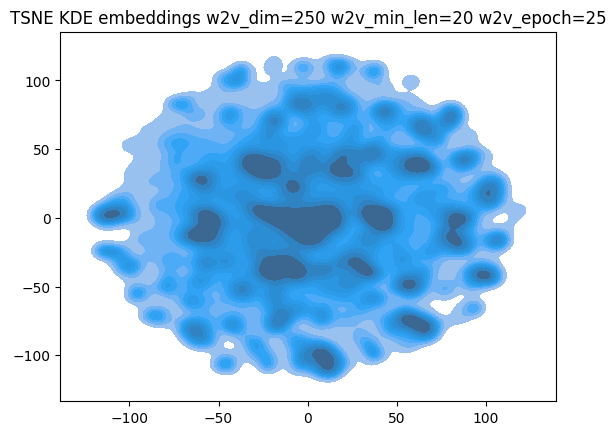

In [6]:
for w2v_dim, w2v_min_len, w2v_epoch in itertools.product(w2v_dims, w2v_min_lens, w2v_epochs):
    vectors = KeyedVectors.load(
            f"{PROJECT_PATH}/clickstream_experiment/data/preprocessed_data/vectors_train_{w2v_dim}_{w2v_min_len}_{w2v_epoch}.kv"
        )
    vecs = np.concatenate(
        [
            vectors.get_vector(k).reshape(1, -1)
            for k in list(vectors.key_to_index.keys())
        ]
    )
    print("Data loaded.")
    vecs2d = TSNE(n_components=2, learning_rate='auto', init='pca', n_jobs=40).fit_transform(vecs)
    with open(f"{PROJECT_PATH}/clickstream_experiment/data/preprocessed_data/vectors_train_{w2v_dim}_{w2v_min_len}_{w2v_epoch}_2d_tsne.npy", "wb") as f:
        pkl.dump(vecs2d, f)
    print("Data transformed.")
    plt.scatter(vecs2d[:, 0], vecs2d[:, 1])
    plt.title(f"TSNE embeddings w2v_dim={w2v_dim} w2v_min_len={w2v_min_len} w2v_epoch={w2v_epoch}")
    plt.savefig(f"{PROJECT_PATH}/clickstream_experiment/analysis/tsne_{w2v_dim}_{w2v_min_len}_{w2v_epoch}.png")
    plt.show()

    sns.kdeplot(
        x=vecs2d[:, 0], y=vecs2d[:, 1], fill=True
    )
    plt.title(f"TSNE KDE embeddings w2v_dim={w2v_dim} w2v_min_len={w2v_min_len} w2v_epoch={w2v_epoch}")
    plt.savefig(f"{PROJECT_PATH}/clickstream_experiment/analysis/tsne_kde_{w2v_dim}_{w2v_min_len}_{w2v_epoch}.png")
    plt.show()